In [1]:
!pwd

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys
sys.executable

/c/Users/shingo/jupyter_notebook/stock_work/03.stock_repo/stock_plot/work


'C:\\Users\\shingo\\Anaconda3\\envs\\stock\\python.exe'

C:\Users\shingo\Anaconda3\envs\stock\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shingo\Anaconda3\envs\stock\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shingo\Anaconda3\envs\stock\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\shingo\Anaconda3\envs\stock\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0, flags=flags)


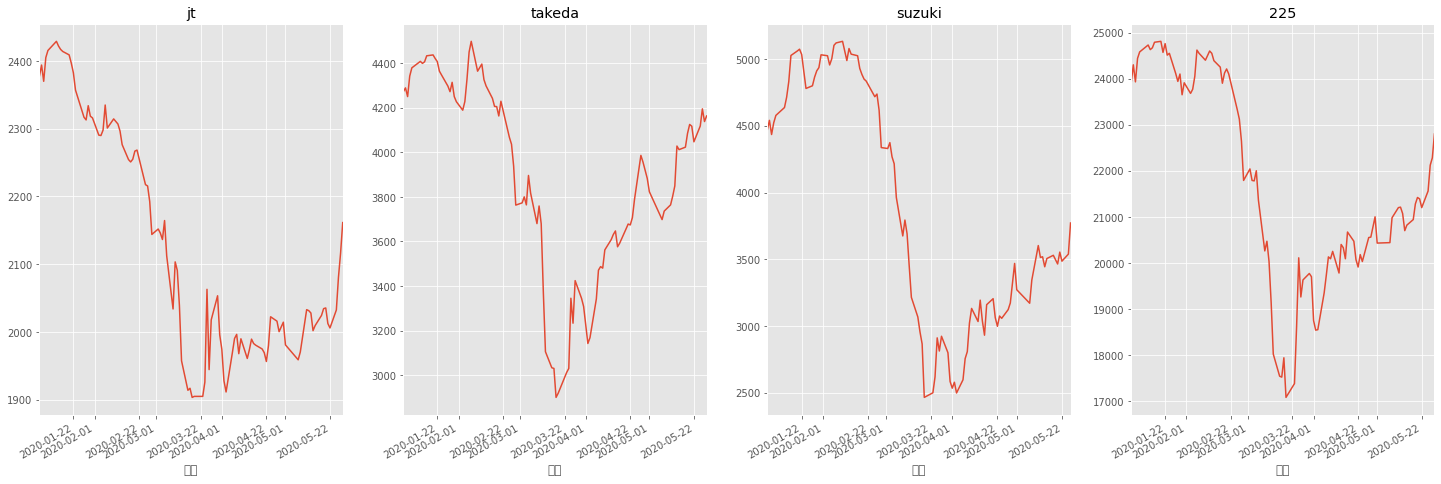

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df_jt = pd.read_csv('../2914.csv', index_col=0, parse_dates=[0], dtype='float', encoding='shift-jis')
df_takeda = pd.read_csv('../4502.csv', index_col=0, parse_dates=[0], dtype='float', encoding='shift-jis')
df_suzuki = pd.read_csv('../7269.csv', index_col=0, parse_dates=[0], dtype='float', encoding='shift-jis')
df_225 = pd.read_csv('../1321.csv', index_col=0, parse_dates=[0], dtype='float', encoding='shift-jis')

# 指定日からのデータだけ使う
start = '2020-01-01'
df_jt, df_takeda, df_suzuki, df_225 = df_jt[start:], df_takeda[start:], df_suzuki[start:], df_225[start:]


def plot_close(df_jt, df_takeda, df_suzuki, df_225):
    """終値を並べてplot"""
    col = '終値'
    fig = plt.figure(figsize=(25, 8))  # subplotでfigsize指定
    df_jt[col].plot(title='jt', ax=fig.add_subplot(1, 4, 1))
    df_takeda[col].plot(title='takeda', ax=fig.add_subplot(1, 4, 2))
    df_suzuki[col].plot(title='suzuki', ax=fig.add_subplot(1, 4, 3))
    df_225[col].plot(title='225', ax=fig.add_subplot(1, 4, 4))
    plt.show()
plot_close(df_jt, df_takeda, df_suzuki, df_225)    

# 収益率可視化

In [3]:
import numpy as np

def add_columns(df):
    df.index.name = 'date'
    
    # 日々の価格幅
    df['day_range'] = df['終値'] / df['始値']

    # 収益率（日々の価格幅を前日の価格で基準化したもの）
    df['return_rate'] = df['終値調整'] / df['終値調整'].shift(1)

    # 対数差収益率(log(当日株価) - log(前日株価) で近似できる)
    # 収益率（日々の価格幅を前日の価格で基準化したもの）を対数化したもの
    df['log_diff_return_rate'] = np.log(df['終値調整']) - np.log(df['終値調整'].shift(1))
    
    return df


df_jt = add_columns(df_jt)
df_takeda = add_columns(df_takeda)
df_suzuki = add_columns(df_suzuki)
df_225 = add_columns(df_225)
display(df_jt.head())

,始値,高値,安値,終値,出来高,終値調整,day_range,return_rate,log_diff_return_rate
date,,,,,,,,,
2020-01-06,2400.0,2410.0,2377.5,2378.0,8912200.0,2378.0,0.990833,NaN,NaN
2020-01-07,2380.0,2394.5,2378.0,2394.0,5471700.0,2394.0,1.005882,1.006728,0.006706
2020-01-08,2365.0,2374.5,2347.5,2370.0,6926600.0,2370.0,1.002114,0.989975,-0.010076
2020-01-09,2387.5,2405.0,2383.0,2405.0,5962500.0,2405.0,1.007330,1.014768,0.014660
2020-01-10,2410.0,2416.0,2399.0,2415.5,3962300.0,2415.5,1.002282,1.004366,0.004356


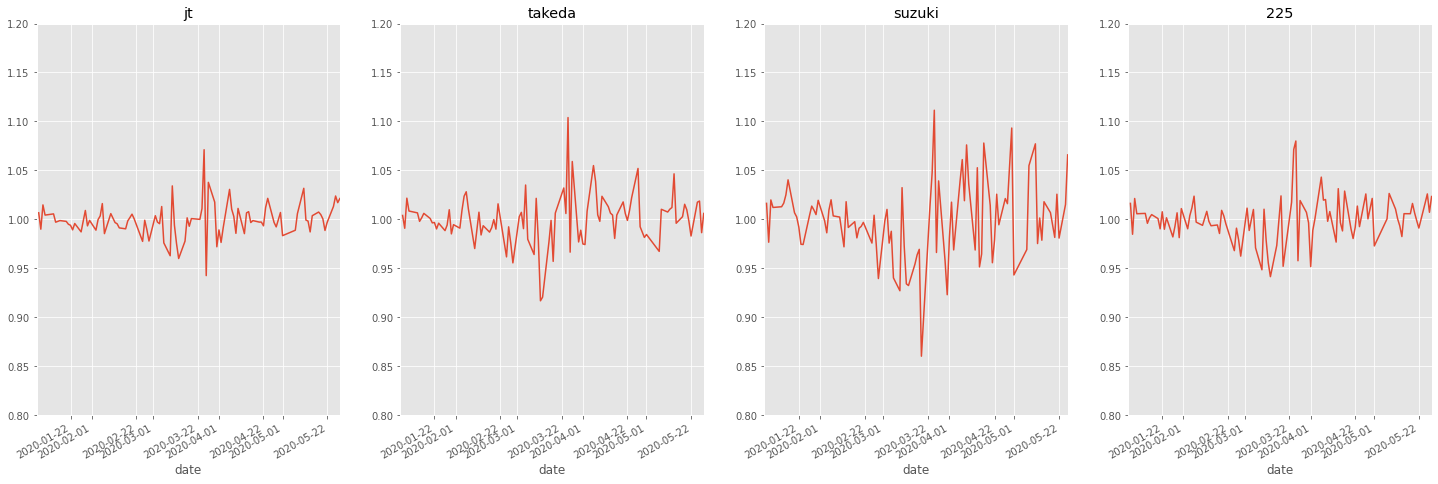

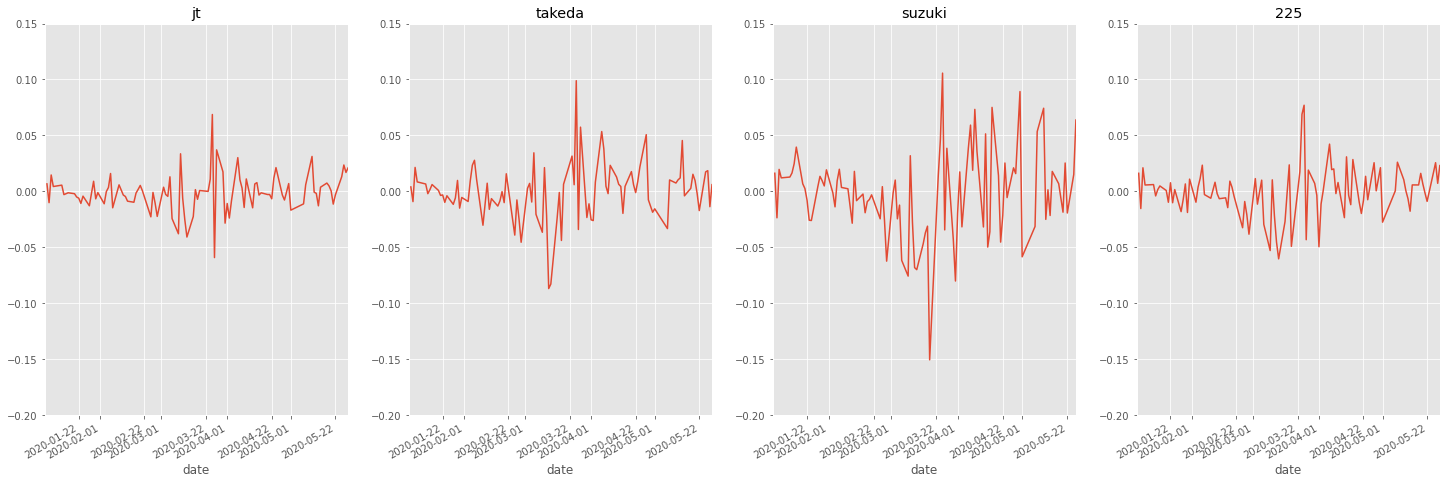

In [4]:
def plot_return_rate(df_jt, df_takeda, df_suzuki, df_225):
    """収益率を並べてplot"""
    col = 'return_rate'
    fig = plt.figure(figsize=(25, 8))  # subplotでfigsize指定
    df_jt[col].plot(title='jt', ax=fig.add_subplot(1, 4, 1))
    plt.ylim([0.8, 1.2])
    df_takeda[col].plot(title='takeda', ax=fig.add_subplot(1, 4, 2))
    plt.ylim([0.8, 1.2])
    df_suzuki[col].plot(title='suzuki', ax=fig.add_subplot(1, 4, 3))
    plt.ylim([0.8, 1.2])
    df_225[col].plot(title='225', ax=fig.add_subplot(1, 4, 4))
    plt.ylim([0.8, 1.2])
    plt.show()
    
    
def plot_log_diff_return_rate(df_jt, df_takeda, df_suzuki, df_225):
    """対数差収益率を並べてplot"""
    col = 'log_diff_return_rate'
    fig = plt.figure(figsize=(25, 8))  # subplotでfigsize指定
    df_jt[col].plot(title='jt', ax=fig.add_subplot(1, 4, 1))
    plt.ylim([-0.2, 0.15])
    df_takeda[col].plot(title='takeda', ax=fig.add_subplot(1, 4, 2))
    plt.ylim([-0.2, 0.15])
    df_suzuki[col].plot(title='suzuki', ax=fig.add_subplot(1, 4, 3))
    plt.ylim([-0.2, 0.15])
    df_225[col].plot(title='225', ax=fig.add_subplot(1, 4, 4))
    plt.ylim([-0.2, 0.15])
    plt.show()
    
    
plot_return_rate(df_jt, df_takeda, df_suzuki, df_225)
plot_log_diff_return_rate(df_jt, df_takeda, df_suzuki, df_225)

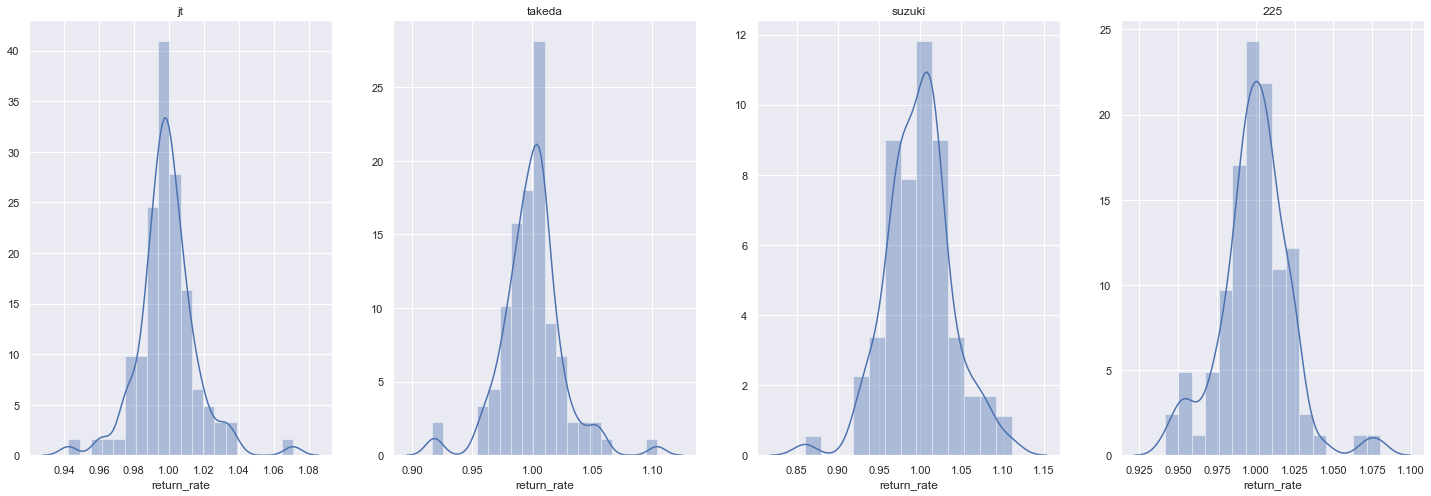

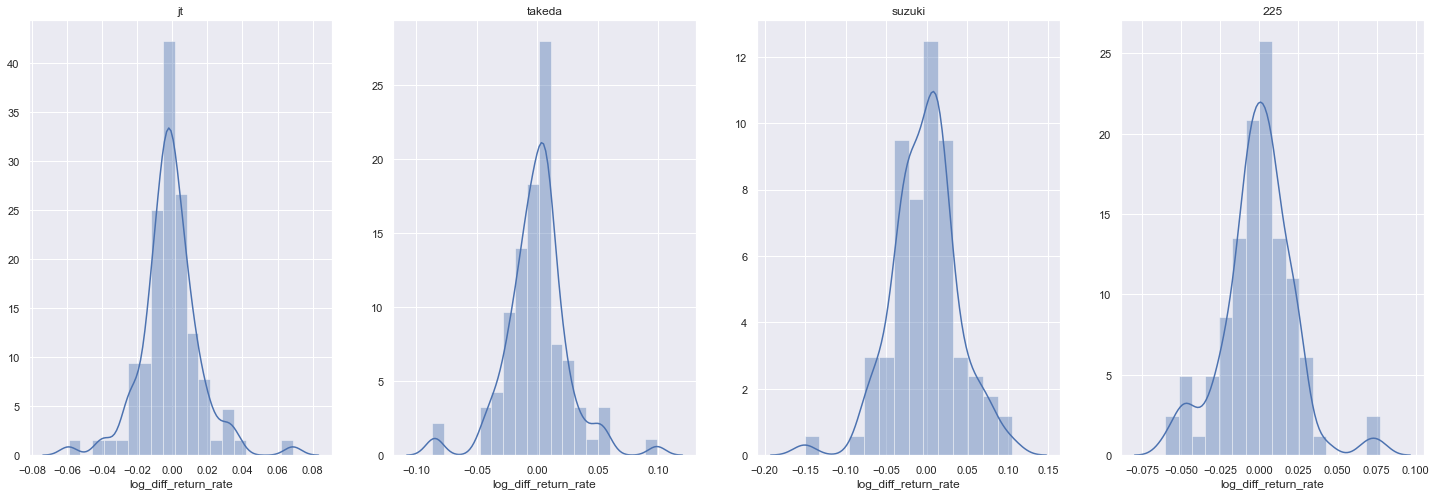

In [5]:
import seaborn as sns
sns.set() # seabornのスタイルで描画する


def plot_log_diff_return_rate(df_jt, df_takeda, df_suzuki, df_225, col='log_diff_return_rate'):
    """収益率のヒストグラムを並べてplot"""
    fig = plt.figure(figsize=(25, 8))  # subplotでfigsize指定
    sns.distplot(df_jt[col], ax=fig.add_subplot(1, 4, 1))
    plt.title('jt')
    sns.distplot(df_takeda[col], ax=fig.add_subplot(1, 4, 2))
    plt.title('takeda')
    sns.distplot(df_suzuki[col], ax=fig.add_subplot(1, 4, 3))
    plt.title('suzuki')
    sns.distplot(df_225[col], ax=fig.add_subplot(1, 4, 4))
    plt.title('225')
    plt.show()
    
    
plot_log_diff_return_rate(df_jt, df_takeda, df_suzuki, df_225, col='return_rate')
plot_log_diff_return_rate(df_jt, df_takeda, df_suzuki, df_225, col='log_diff_return_rate')

# 収益率の相関係数確認

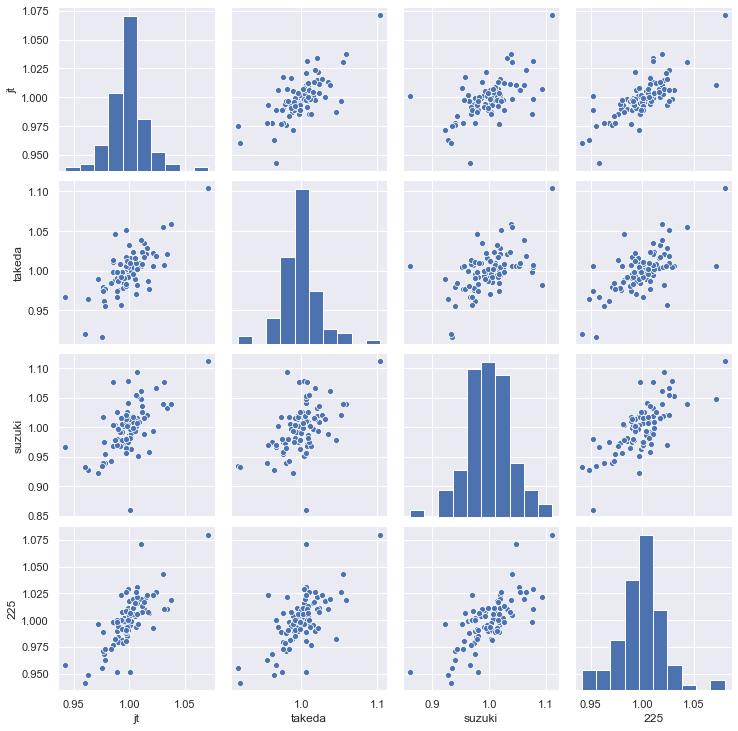

,jt,takeda,suzuki,225
jt,1.000000,0.709785,0.592488,0.750155
takeda,0.709785,1.000000,0.524192,0.663907
suzuki,0.592488,0.524192,1.000000,0.732523
225,0.750155,0.663907,0.732523,1.000000


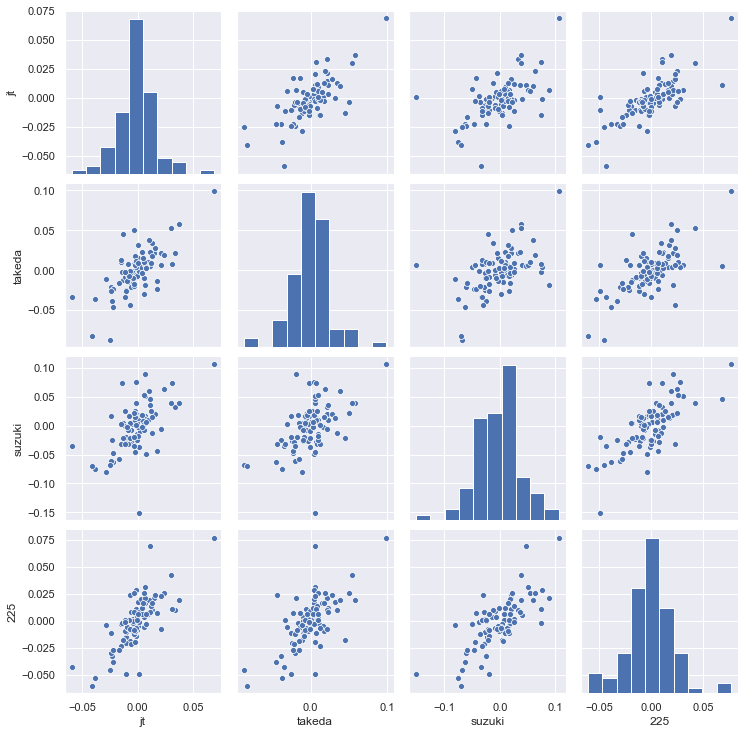

,jt,takeda,suzuki,225
jt,1.000000,0.705629,0.585299,0.750567
takeda,0.705629,1.000000,0.520424,0.664414
suzuki,0.585299,0.520424,1.000000,0.732344
225,0.750567,0.664414,0.732344,1.000000


In [6]:
col = 'return_rate'
_df = pd.DataFrame({'jt': df_jt[col], 
                    'takeda': df_takeda[col], 
                    'suzuki': df_suzuki[col], 
                    '225': df_225[col]})
sns.pairplot(_df)
plt.show()
display(_df.corr())  # 相関係数

col = 'log_diff_return_rate'
_df = pd.DataFrame({'jt': df_jt[col], 
                    'takeda': df_takeda[col], 
                    'suzuki': df_suzuki[col], 
                    '225': df_225[col]})
sns.pairplot(_df)
plt.show()
display(_df.corr())  # 相関係数

# 収益率が正規分布か確認

In [7]:
import scipy.stats as stats

# Shapiro-Wilk（シャピロ-ウィルク）検定：データが正規分布しているか判断するための検定
# 出力結果は（W, p値） p値<0.05なら、帰無仮説=「正規分布である」を棄却して、正規分布でないと解釈
col = 'return_rate'
print('jt:', stats.shapiro(df_jt[col].dropna()))  # 欠損あるとおなしくなるので、dropnaで欠損を削除
print('takeda:', stats.shapiro(df_takeda[col].dropna()))  # 欠損あるとおなしくなるので、dropnaで欠損を削除
print('suzuki:', stats.shapiro(df_suzuki[col].dropna()))  # 欠損あるとおなしくなるので、dropnaで欠損を削除
print('225:', stats.shapiro(df_225[col].dropna()))  # 欠損あるとおなしくなるので、dropnaで欠損を削除

col = 'log_diff_return_rate'
print('jt:', stats.shapiro(df_jt[col].dropna()))  # 欠損あるとおなしくなるので、dropnaで欠損を削除
print('takeda:', stats.shapiro(df_takeda[col].dropna()))  # 欠損あるとおなしくなるので、dropnaで欠損を削除
print('suzuki:', stats.shapiro(df_suzuki[col].dropna()))  # 欠損あるとおなしくなるので、dropnaで欠損を削除
print('225:', stats.shapiro(df_225[col].dropna()))  # 欠損あるとおなしくなるので、dropnaで欠損を削除

jt: (0.9340640902519226, 0.00012912441161461174)
takeda: (0.937410831451416, 0.0002010475582210347)
suzuki: (0.9787436127662659, 0.13810691237449646)
225: (0.9553188681602478, 0.002610068768262863)
jt: (0.9372040033340454, 0.0001955604529939592)
takeda: (0.9389871954917908, 0.0002485841978341341)
suzuki: (0.9757988452911377, 0.08450878411531448)
225: (0.9576647877693176, 0.003749631578102708)
